In [2]:
import pandas as pd

# Загрузка даних
dataframe = pd.read_csv('avocado.csv', delimiter=',', encoding='latin1')

# Видалення нульових значень
dataframe = dataframe.dropna()

# Вивід даних
dataframe

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [16]:
from sklearn.preprocessing import StandardScaler

# Вибір двох стовпців по 1000 рядків
data = dataframe[['Small Bags', 'Large Bags', 'Total Bags']][:1000]

# Нормалізація даних
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [26]:
from sklearn.decomposition import PCA

# Створення моделі PCA

n_components = 3
pca = PCA(n_components=n_components)

# Навчання моделі
pca.fit(data)

# Застосування PCA для отримання нових даних
new_data = pca.transform(data)

In [28]:
# Аналіз отриманих результатів через варіанси головних компонент

# Варіанс показує важливість кожної головної компоненти, тобто яка компонента описує більше даних

# Отримання варіансу кожної головної компоненти
explained_variance = pca.explained_variance_

# Вивід варіансів
for i in range(n_components):
    print(f'Варіанс {i+1}: {explained_variance[i]}')
    
print()
print('З результату видно, що важливіша перша головна компонента')

Варіанс 1: 2.366407563097758
Варіанс 2: 0.6359439349202181
Варіанс 3: 0.0006515049850291137

З результату видно, що важливіша перша головна компонента


In [29]:
# Вивід характеристик PCA

# Отримання проценту кумулятивної дисперсії
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Вивід інформації про кожну головну компоненту
for i in range(n_components):
    print(f'Варіанс {i + 1} головної компоненти: {explained_variance[i]}')
    print(f'Відсоток кумулятивної дисперсії {i + 1} головної компоненти: {cumulative_variance[i] * 100}%')
    print()

# Вивід загальної інформації про варіанс головних компонент
total_variance_explained = pca.explained_variance_ratio_.sum()
print(f'Загальний відсоток кумулятивної дисперсії: {total_variance_explained * 100}%')
print()
print(f'Кумулятивна дисперсія показує який відсоток початкових даних зберігають у собі компоненти')

Варіанс 1 головної компоненти: 2.366407563097758
Відсоток кумулятивної дисперсії 1 головної компоненти: 78.80137185115528%

Варіанс 2 головної компоненти: 0.6359439349202181
Відсоток кумулятивної дисперсії 2 головної компоненти: 99.97830488399853%

Варіанс 3 головної компоненти: 0.0006515049850291137
Відсоток кумулятивної дисперсії 3 головної компоненти: 100.0%

Загальний відсоток кумулятивної дисперсії: 100.0%

Кумулятивна дисперсія показує який відсоток початкових даних зберігають у собі компоненти


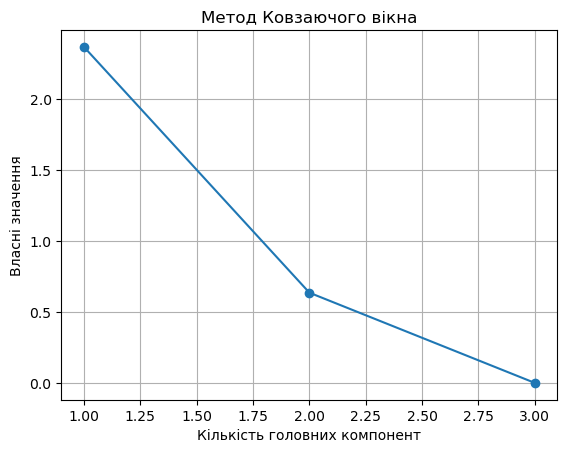


Точка згину вказує на оптимальну кількість компонент, отже оптимальна кількість - 2


In [31]:
import matplotlib.pyplot as plt

# Визначення оптимальної кількості головних компонент графічним методом

# Створення графік методом "Ковзаючого вікна" (Scree Plot)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Кількість головних компонент')
plt.ylabel('Власні значення')
plt.title('Метод Ковзаючого вікна')
plt.grid(True)
plt.show()

print()
print(f'Точка згину вказує на оптимальну кількість компонент, отже оптимальна кількість - 2')

In [36]:
from sklearn.cluster import KMeans

# Завдання 7, 8, 9 - застосування алгоритму PCA для підготовки даних на вхід до класифікаційної моделі

# Вибір двох стовпців по 1000 рядків для класетризації
data_for_clusterization = dataframe[['Small Bags', 'Large Bags']][:1000]

# Нормалізація даних
scaler = StandardScaler()
data_for_clusterization = scaler.fit_transform(data_for_clusterization)

# Створення моделі PCA для перетворення даних, що підуть на вхід до моделі класифікації
n_components_for_clusterization = 2
pca_for_clusterization = PCA(n_components=n_components_for_clusterization)

# Навчання моделі
pca_for_clusterization.fit(data_for_clusterization)

# Застосування PCA для отримання нових даних
new_data_for_clusterization = pca_for_clusterization.transform(data_for_clusterization)

# Кластеризація даних з допомогою алгоритму K-means
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(new_data_for_clusterization)
labels_kmeans = kmeans.labels_

In [41]:
from sklearn.metrics import silhouette_score

# Оцінка якості моделі KMeans

# Оцінка коефіцієнта силуету
cluster_labels = kmeans.fit_predict(data_for_clusterization)
silhouette_avg = silhouette_score(data_for_clusterization, cluster_labels)

print(f"Чим ближче значення до 1 - тим краща кластеризація, чим ближче до -1 - тим гірша")
print()
print(f"Silhouette Score: {silhouette_avg}")

Чим ближче значення до 1 - тим краща кластеризація, чим ближче до -1 - тим гірша

Silhouette Score: 0.6557537349568393


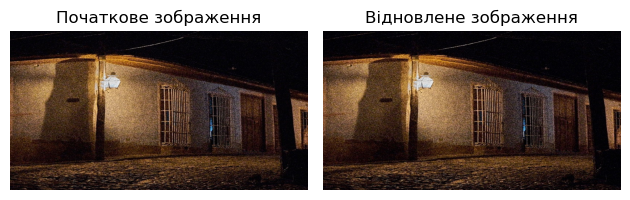

In [59]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# Зниження зашумленості зображення

# Завантаження зображення
image = io.imread('noiseimage.jpg')

# Перетворення зображення в числовий масив
image_data = np.array(image)

# Перетворення зображення на одномірний масив для подачі на PCA
height, width, channels = image_data.shape
image_reshaped = image_data.reshape((height * width, channels))

# Кількість головних компонент для збереження
n_components = 3

# Застосування PCA для зменшення розмірності
pca = PCA(n_components=n_components)
image_reduced = pca.fit_transform(image_reshaped)

# Відновлення зменшеного зображення
image_restored = pca.inverse_transform(image_reduced)
image_restored = image_restored.reshape((height, width, channels))

# Виведення зображення перед застосуванням PCA
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Початкове зображення')
plt.axis('off')

# Виведення відновленого зображення після застосування PCA
plt.subplot(1, 2, 2)
plt.imshow(image_restored.astype(np.uint8))
plt.title(f'Відновлене зображення')
plt.axis('off')

plt.tight_layout()
plt.show()